In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import NaN
from sklearn.metrics import mean_squared_error
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

# load data
data = pd.read_csv ('dataset_v2.csv')
# delete useless column
data.drop(columns=['feature_0'], inplace=True)
# change label
data.loc[:,'feature_2'] = data.loc[:,'feature_2'].map({'F':0, 'M':1})
data.loc[:,'feature_4'] = data.loc[:,'feature_4'].map({'OD':0, 'OS':1})
# delete nan data
#data = data.dropna()
# replace 
#data = data.replace('', '0')
# if nan then fill '0'
data = data.fillna(0)


# get input and output
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
import os
os.getcwd()
data.head()
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
print('X train shape = {}, Y train shape = {}\n'.format(X.shape, y.shape))
#X_train_origin = X_train.copy()

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import scale
## (a)
print("----Question A----")
regressor_a = make_pipeline(StandardScaler(), LinearRegression(n_jobs= -1,normalize= True))
#regressor_a = LinearRegression()
#x_train_normalize = scale(X_train)
regressor_a.fit(X, y)
regressor_a.score(X, y)
RMSE = rmse(y,regressor_a.predict(X))
print("RMSE: ",RMSE,"\nscore: ",regressor_a.score(X, y))


X train shape = (519, 118), Y train shape = (519,)

----Question A----
RMSE:  3.7286370566293905 
score:  0.6653552939617771


In [2]:
## (b)
print("----Question B----")
record = []
def takeSecond(elem):
    return elem[1]
for feature in range(len(X[2])):
    # get input and output
    X_b = data.iloc[:, feature].values.reshape(-1,1)
    y_b = data.iloc[:, -1].values.reshape(-1,1)
    regressor_b = LinearRegression(n_jobs= -1,normalize= True)
    regressor_b.fit(X_b, y_b)
    RMSE = rmse(y_b,regressor_b.predict(X_b))
    record.append(("feature_"+str(feature+ 1), RMSE))
    #print("feature_"+str(feature+ 1)+" RMSE: ",RMSE)
record.sort(key=takeSecond)
result_b = pd.DataFrame(data = record, index = range(len(X[2])), columns = ['feature_name','RMSE'])
result_b.to_csv('RMSE.csv') # use pandas' object only



----Question B----


----Question C----


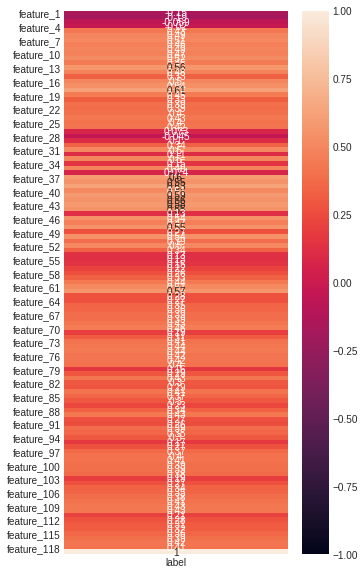

In [3]:
## (c)
print("----Question C----")
# setting plotting environment
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

import seaborn as sns
# Pearson correlation
plt.figure(figsize=(5, 10))  # set figure length and widh
sns.heatmap(data.corr().loc[:,['label']], annot=True, vmin=-1, vmax=1)
result_c = data.corr().loc[:,['label']].sort_values(by='label',ascending = False)
result_c.to_csv('Pearson.csv') # use pandas' object only


In [4]:
## (e) Use ANFIS method to find minimun RMSE error
print("----Question E----")
rmse_data = pd.read_csv('RMSE.csv')
count =0
rm = []
#print(rmse_data.shape[0])
regressor_e= make_pipeline(StandardScaler(), LinearRegression(n_jobs= -1,normalize= True))
min_rmse = 999 # Initial value set a very big value
X_e = pd.DataFrame()



for feature_num in range(1,rmse_data.shape[0]+1): # 1 to 118
    # get input and output
    X_e = pd.DataFrame()
    for i in range(feature_num):
        X_input = data.loc[:, [rmse_data.iloc[:,1].values[i]]]
        X_e = pd.concat([X_e, X_input],axis=1)
    y_e = data.iloc[:, -1].values.reshape(-1,1)
    regressor_e.fit(X_e,y_e)
    if min_rmse > rmse(y_e,regressor_e.predict(X_e)):
        min_rmse = rmse(y_e,regressor_e.predict(X_e))
        rm.append(rmse(y_e,regressor_e.predict(X_e)))
    else: 
        rm.append(rmse(y_e,regressor_a.predict(X_e)))
    count = count+1  
print(min_rmse)
print(count)
#regressor_e.fit(X, y)

----Question E----
3.72863705662939
118


In [5]:
X_e = data.loc[:, [rmse_data.iloc[:,1].values[0]]]
X_y = data.loc[:, [rmse_data.iloc[:,1].values[0]]]
X_z = pd.concat([X_e, X_y],axis=1)
print(X_b[0:2])
aaa = pd.DataFrame()


[[0.298]
 [0.264]]


In [6]:
print(X.shape[0])
print(len(X[1]))
for a in range(10):
    print(a)

519
118
0
1
2
3
4
5
6
7
8
9
